# Please install seaborn, matplotlib, pyarrow first

# Parse raw data into pandas dataframe

In [1]:
data_raw = open("agaricus-lepiota.data")

In [2]:
import pandas as pd

In [3]:
def parse_raw_data(data_raw):
    """
    Parse raw dat file and turn it into pandas dataframe
    """
    
    data = []
    for line in data_raw:
        row = line.rstrip("\n")
        field_list = row.split(",")
        field_list = map(lambda x: "unknown" if x == "?" else x, field_list)
        
        # label:
        # 0 -- poison
        # 1 -- edible
        label = field_list[0]
        if label == "p":
            field_list[0] = 0
        elif label == "e":
            field_list[0] = 1
        else:
            raise NotImplementedError("Unexpected label {:s}".format(label))
        
        data.append(field_list)
    
    columns = [
        "label",
        "cap-shape",
        "cap-surface",
        "cap-color",
        "bruises",
        "odor",
        "gill-attachment",
        "gill-spacing",
        "gill-size",
        "gill-color",
        "stalk-shape",
        "stalk-root",
        "stalk-surface-above-ring",
        "stalk-surface-below-ring",
        "stalk-color-above-ring",
        "stalk-color-below-ring",
        "veil-type",
        "veil-color",
        "ring-number",
        "ring-type",
        "spore-print-color",
        "population",
        "habitat",
    ]
    
    df = pd.DataFrame(data, columns=columns)
    
    return df
    

In [4]:
df = parse_raw_data(data_raw)

# Data exploration

In [5]:
df

,label,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,1,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,1,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,1,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,1,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,0,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,1,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [6]:
df["stalk-root"].value_counts()

b          3776
unknown    2480
e          1120
c           556
r           192
Name: stalk-root, dtype: int64

In [7]:
df["odor"].value_counts()

n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64

In [8]:
import seaborn as sns

In [9]:
# distribution of column cardinality
def plot_cardinality(data):
    data_to_plot = []
    for column in filter(lambda x: x != "label", df.columns):
        n_unique = df[column].nunique()
        data_to_plot.append((column, n_unique))
    
    data_to_plot = sorted(data_to_plot, key=lambda x: x[1], reverse=True)
    
    y, x = zip(*data_to_plot)
    sns.barplot(x, y, orient="h")


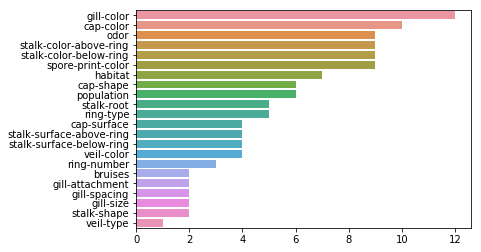

In [10]:
plot_cardinality(df)

# Turn into one-hot encoding and save it

In [11]:
df_onehot = pd.get_dummies(df, prefix_sep="__", columns=filter(lambda x: x != "label", df.columns))

In [12]:
df_onehot

,label,cap-shape__b,cap-shape__c,cap-shape__f,cap-shape__k,cap-shape__s,cap-shape__x,cap-surface__f,cap-surface__g,cap-surface__s,...,population__s,population__v,population__y,habitat__d,habitat__g,habitat__l,habitat__m,habitat__p,habitat__u,habitat__w
0,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [13]:
df_onehot.to_parquet("data.parq")

# Validation of data loading

In [14]:
df_load = pd.read_parquet("data.parq")

In [15]:
df_load

,label,cap-shape__b,cap-shape__c,cap-shape__f,cap-shape__k,cap-shape__s,cap-shape__x,cap-surface__f,cap-surface__g,cap-surface__s,...,population__s,population__v,population__y,habitat__d,habitat__g,habitat__l,habitat__m,habitat__p,habitat__u,habitat__w
0,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
